In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from math import pi

In [2]:
from windrose import WindroseAxes

# Importamos los datos de un Excel

In [3]:
df = pd.read_excel('Datos_Rosa_de_Vientos.xlsx')

In [4]:
df

,ID,VELOCIDAD,DIRECCARD,DIRECCION
0,E-01,1.3,SSW,202.5
1,E-01,1.3,SSW,202.5
2,E-01,1.3,SSW,202.5
3,E-01,1.3,SSW,202.5
4,E-01,2.2,SSE,157.5
5,E-01,1.8,SSE,157.5
6,E-01,2.2,SSE,157.5
7,E-01,3.1,SE,135.0
8,E-01,2.7,SE,135.0
9,E-01,2.2,SE,135.0


# Generamos un grafico de puntos velocidad x vs. velocidad y

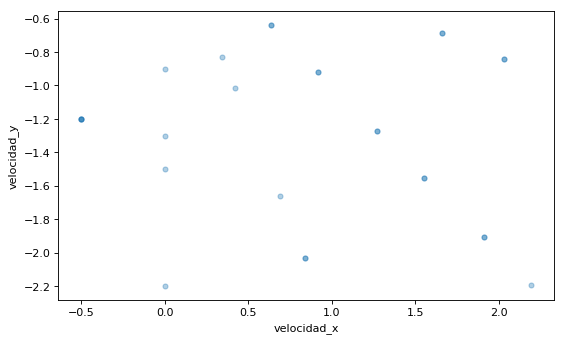

In [5]:
df['velocidad_x'] = df['VELOCIDAD'] * np.sin(df['DIRECCION'] * pi / 180.0)
df['velocidad_y'] = df['VELOCIDAD'] * np.cos(df['DIRECCION'] * pi / 180.0)
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect('equal')
_ = df.plot(kind='scatter', x='velocidad_x', y='velocidad_y', alpha=0.35, ax=ax)

# Presentamos la Rosa de Vientos como un Histograma Apilado Normado (representado en porcentaje)

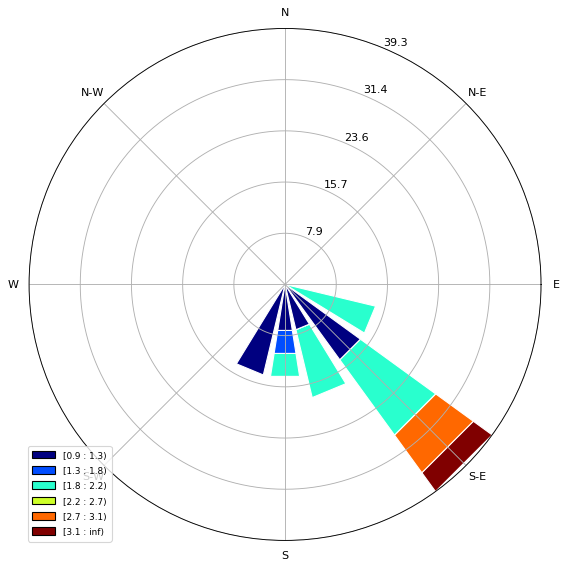

In [6]:
ax = WindroseAxes.from_ax()
ax.bar(df.DIRECCION, df.VELOCIDAD, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

# Otra forma de Histograma Apilado, no normado, pero con rangos

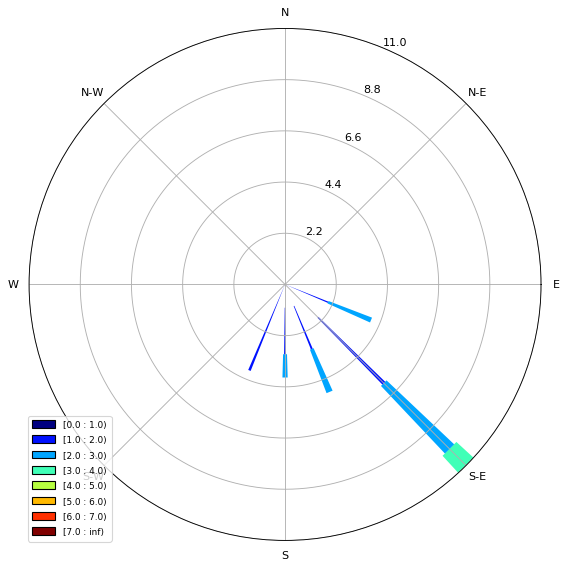

In [7]:
ax = WindroseAxes.from_ax()
ax.box(df.DIRECCION, df.VELOCIDAD, bins=np.arange(0, 8, 1))
ax.set_legend()

# La Rosa de Vientos con relleno y mapa de color definido

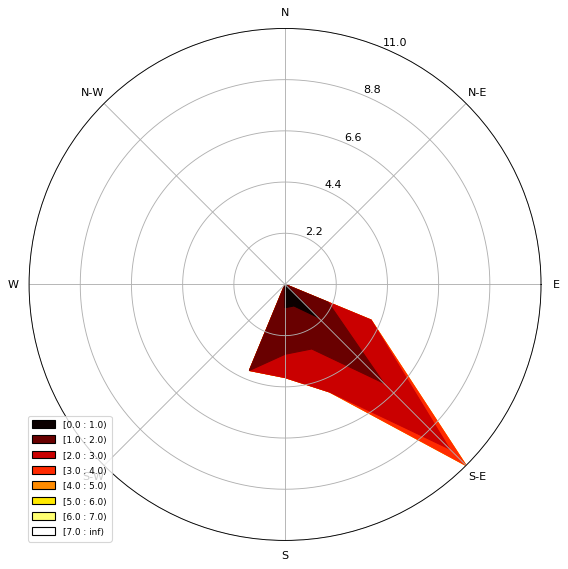

In [8]:
ax = WindroseAxes.from_ax()
ax.contourf(df.DIRECCION, df.VELOCIDAD, bins=np.arange(0, 8, 1), cmap=cm.hot)
ax.set_legend()

# La Rosa de Vientos con relleno y lineas de contorno

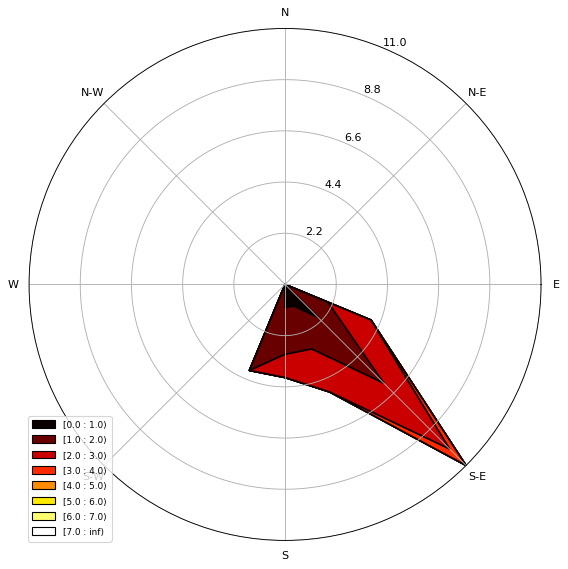

In [9]:
ax = WindroseAxes.from_ax()
ax.contourf(df.DIRECCION, df.VELOCIDAD, bins=np.arange(0, 8, 1), cmap=cm.hot)
ax.contour(df.DIRECCION, df.VELOCIDAD, bins=np.arange(0, 8, 1), colors='black')
ax.set_legend()

# La Rosa de Vientos con lineas de contorno

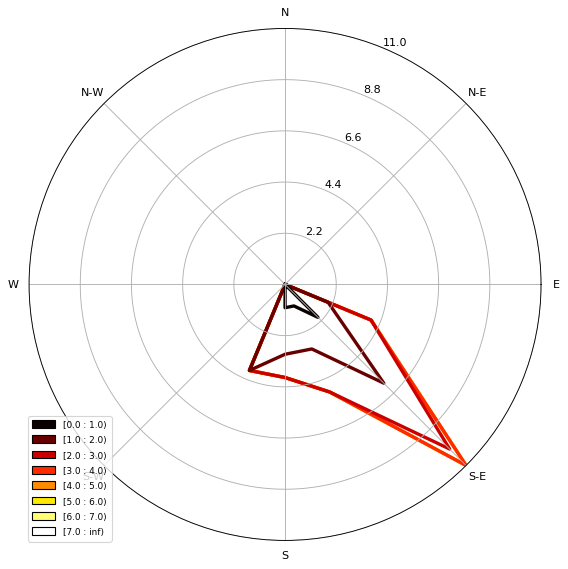

In [10]:
ax = WindroseAxes.from_ax()
ax.contour(df.DIRECCION, df.VELOCIDAD, bins=np.arange(0, 8, 1), cmap=cm.hot, lw=3)
ax.set_legend()